# Import Data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [22]:
# Use the raw file URLs from GitHub
train_data_url = 'https://raw.githubusercontent.com/Rajlaxmi-giri/Rajlaxmi_kaggle/main/train.csv'
test_data_url = 'https://raw.githubusercontent.com/Rajlaxmi-giri/Rajlaxmi_kaggle/main/test.csv'
submission_data_url = 'https://raw.githubusercontent.com/Rajlaxmi-giri/Rajlaxmi_kaggle/main/sample_submission.csv'

In [24]:
# Read the data
train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)
submission_data = pd.read_csv(submission_data_url)

In [26]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
train_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [29]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [30]:
train_data.duplicated().sum()

np.int64(0)

In [31]:
train_data.shape

(7613, 5)

In [32]:
train_data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

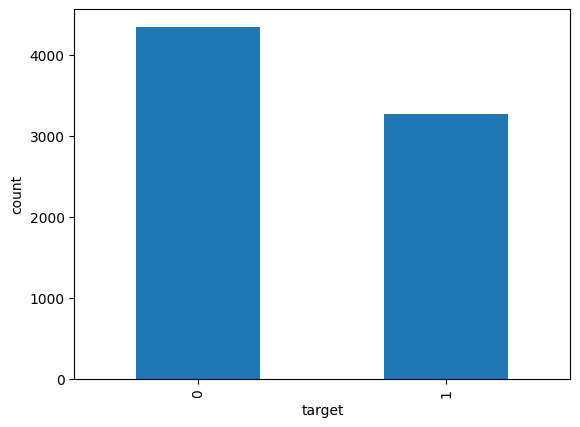

In [33]:
sns.countplot(train_data['target'])
train_data['target'].value_counts().plot(kind='bar')


([<matplotlib.patches.Wedge at 0x28291ef9c70>,
 [Text(-0.24110484190293122, 1.0732513476399472, '0'),
  Text(0.2411046798464836, -1.0732513840457532, '1')],
 [Text(-0.13151173194705337, 0.5854098259854257, '57.03%'),
  Text(0.1315116435526274, -0.585409845843138, '42.97%')])

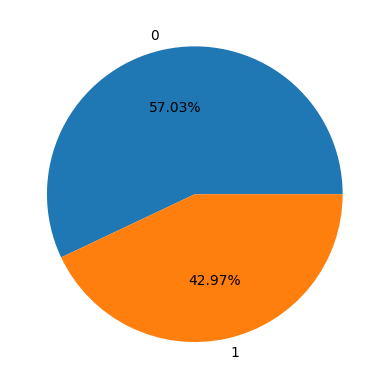

In [34]:

plt.pie(train_data['target'].value_counts(), labels=train_data['target'].value_counts().index, autopct='%0.2f%%')

In [35]:
train_data['num_characters'] = train_data['text'].apply(lambda x: len(str(x)))

train_data

,id,keyword,location,text,target,num_characters
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [39]:

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AADIRA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\AADIRA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [40]:
train_data['num_words'] = train_data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
train_data

,id,keyword,location,text,target,num_characters,num_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,24
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,13
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,24
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,21


In [41]:
train_data['num_sentences']=train_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
train_data

,id,keyword,location,text,target,num_characters,num_words,num_sentences
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,24,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,13,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,24,2
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,21,2


In [42]:
train_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7613.000000,7613.000000,7613.000000
mean,101.037436,18.917904,1.558518
std,33.781325,6.873545,0.966000
min,7.000000,1.000000,1.000000
25%,78.000000,14.000000,1.000000
50%,107.000000,19.000000,1.000000
75%,133.000000,24.000000,2.000000
max,157.000000,72.000000,22.000000


In [43]:
train_data[train_data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3271.000000,3271.000000,3271.000000
mean,108.113421,19.258025,1.414246
std,29.309854,6.018835,0.792105
min,14.000000,2.000000,1.000000
25%,88.000000,15.000000,1.000000
50%,115.000000,20.000000,1.000000
75%,136.000000,24.000000,2.000000
max,151.000000,39.000000,8.000000


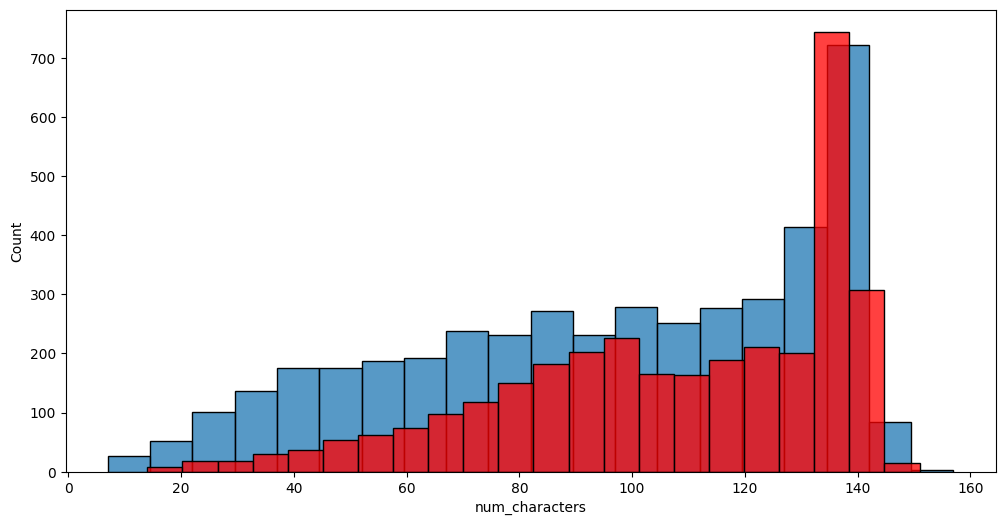

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['target']==0]['num_characters'])
sns.histplot(train_data[train_data['target']==1]['num_characters'],color='red')
plt.show()

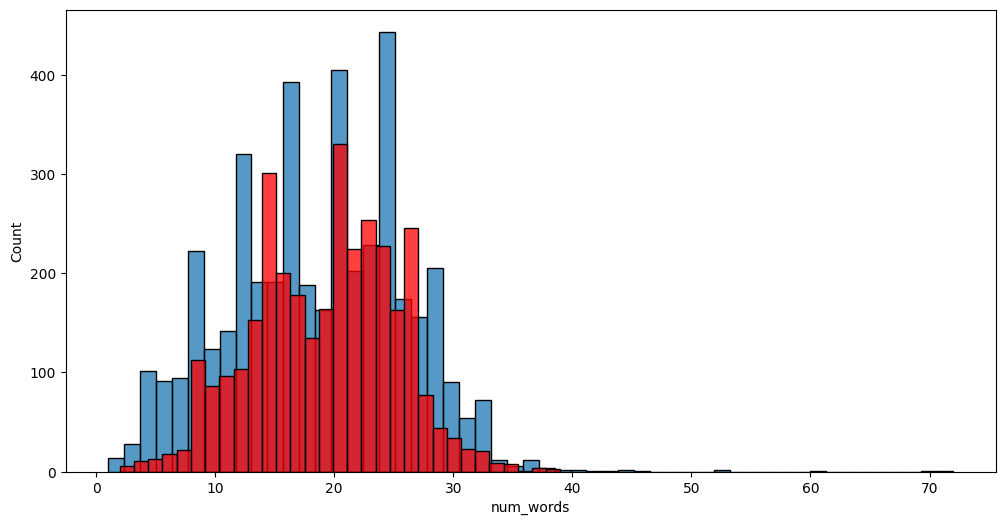

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['target']==0]['num_words'])
sns.histplot(train_data[train_data['target']==1]['num_words'],color='red')
plt.show()

# Text Preprocessing

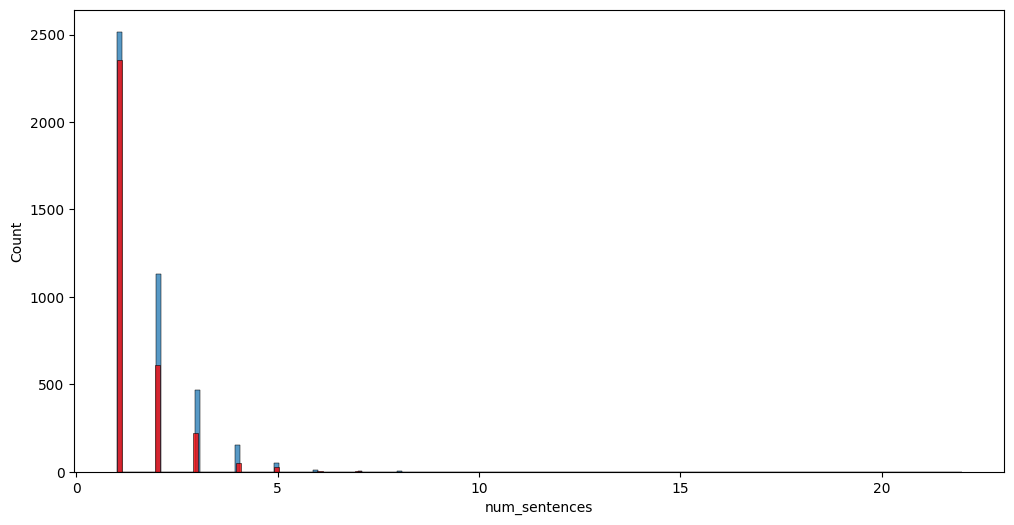

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['target']==0]['num_sentences'])
sns.histplot(train_data[train_data['target']==1]['num_sentences'],color='red')
plt.show()

# Model Building